In [ ]:
import os
if 'COLAB_GPU' in os.environ:
  print("Gpu enabled")
else:
  print("Gpu is not enabled!")

Gpu enabled


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00


In [ ]:
import ultralytics

print(ultralytics.__version__)
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [ ]:
%pwd

'/content'

In [ ]:
!mkdir vehicle_Types


In [ ]:
os.chdir("/content/vehicle_Types")
%pwd

'/content/vehicle_Types'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oxS8ySgvYk8fp85xIbZk")
project = rf.workspace("fyp-d6qu7").project("vehicle-type-detection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicle-type-detection-1 in yolov8:: 100%|██████████| 11862/11862 [00:01<00:00, 6589.58it/s]


In [ ]:
cd /content/vehicle_Types/vehicle-type-detection-1

/content/vehicle_Types/vehicle-type-detection-1


In [ ]:
%pwd

'/content/vehicle_Types/vehicle-type-detection-1'

In [ ]:
!yolo task=detect mode = train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [ ]:
!ls /content/vehicle_Types/vehicle-type-detection-1/runs/detect/train2

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


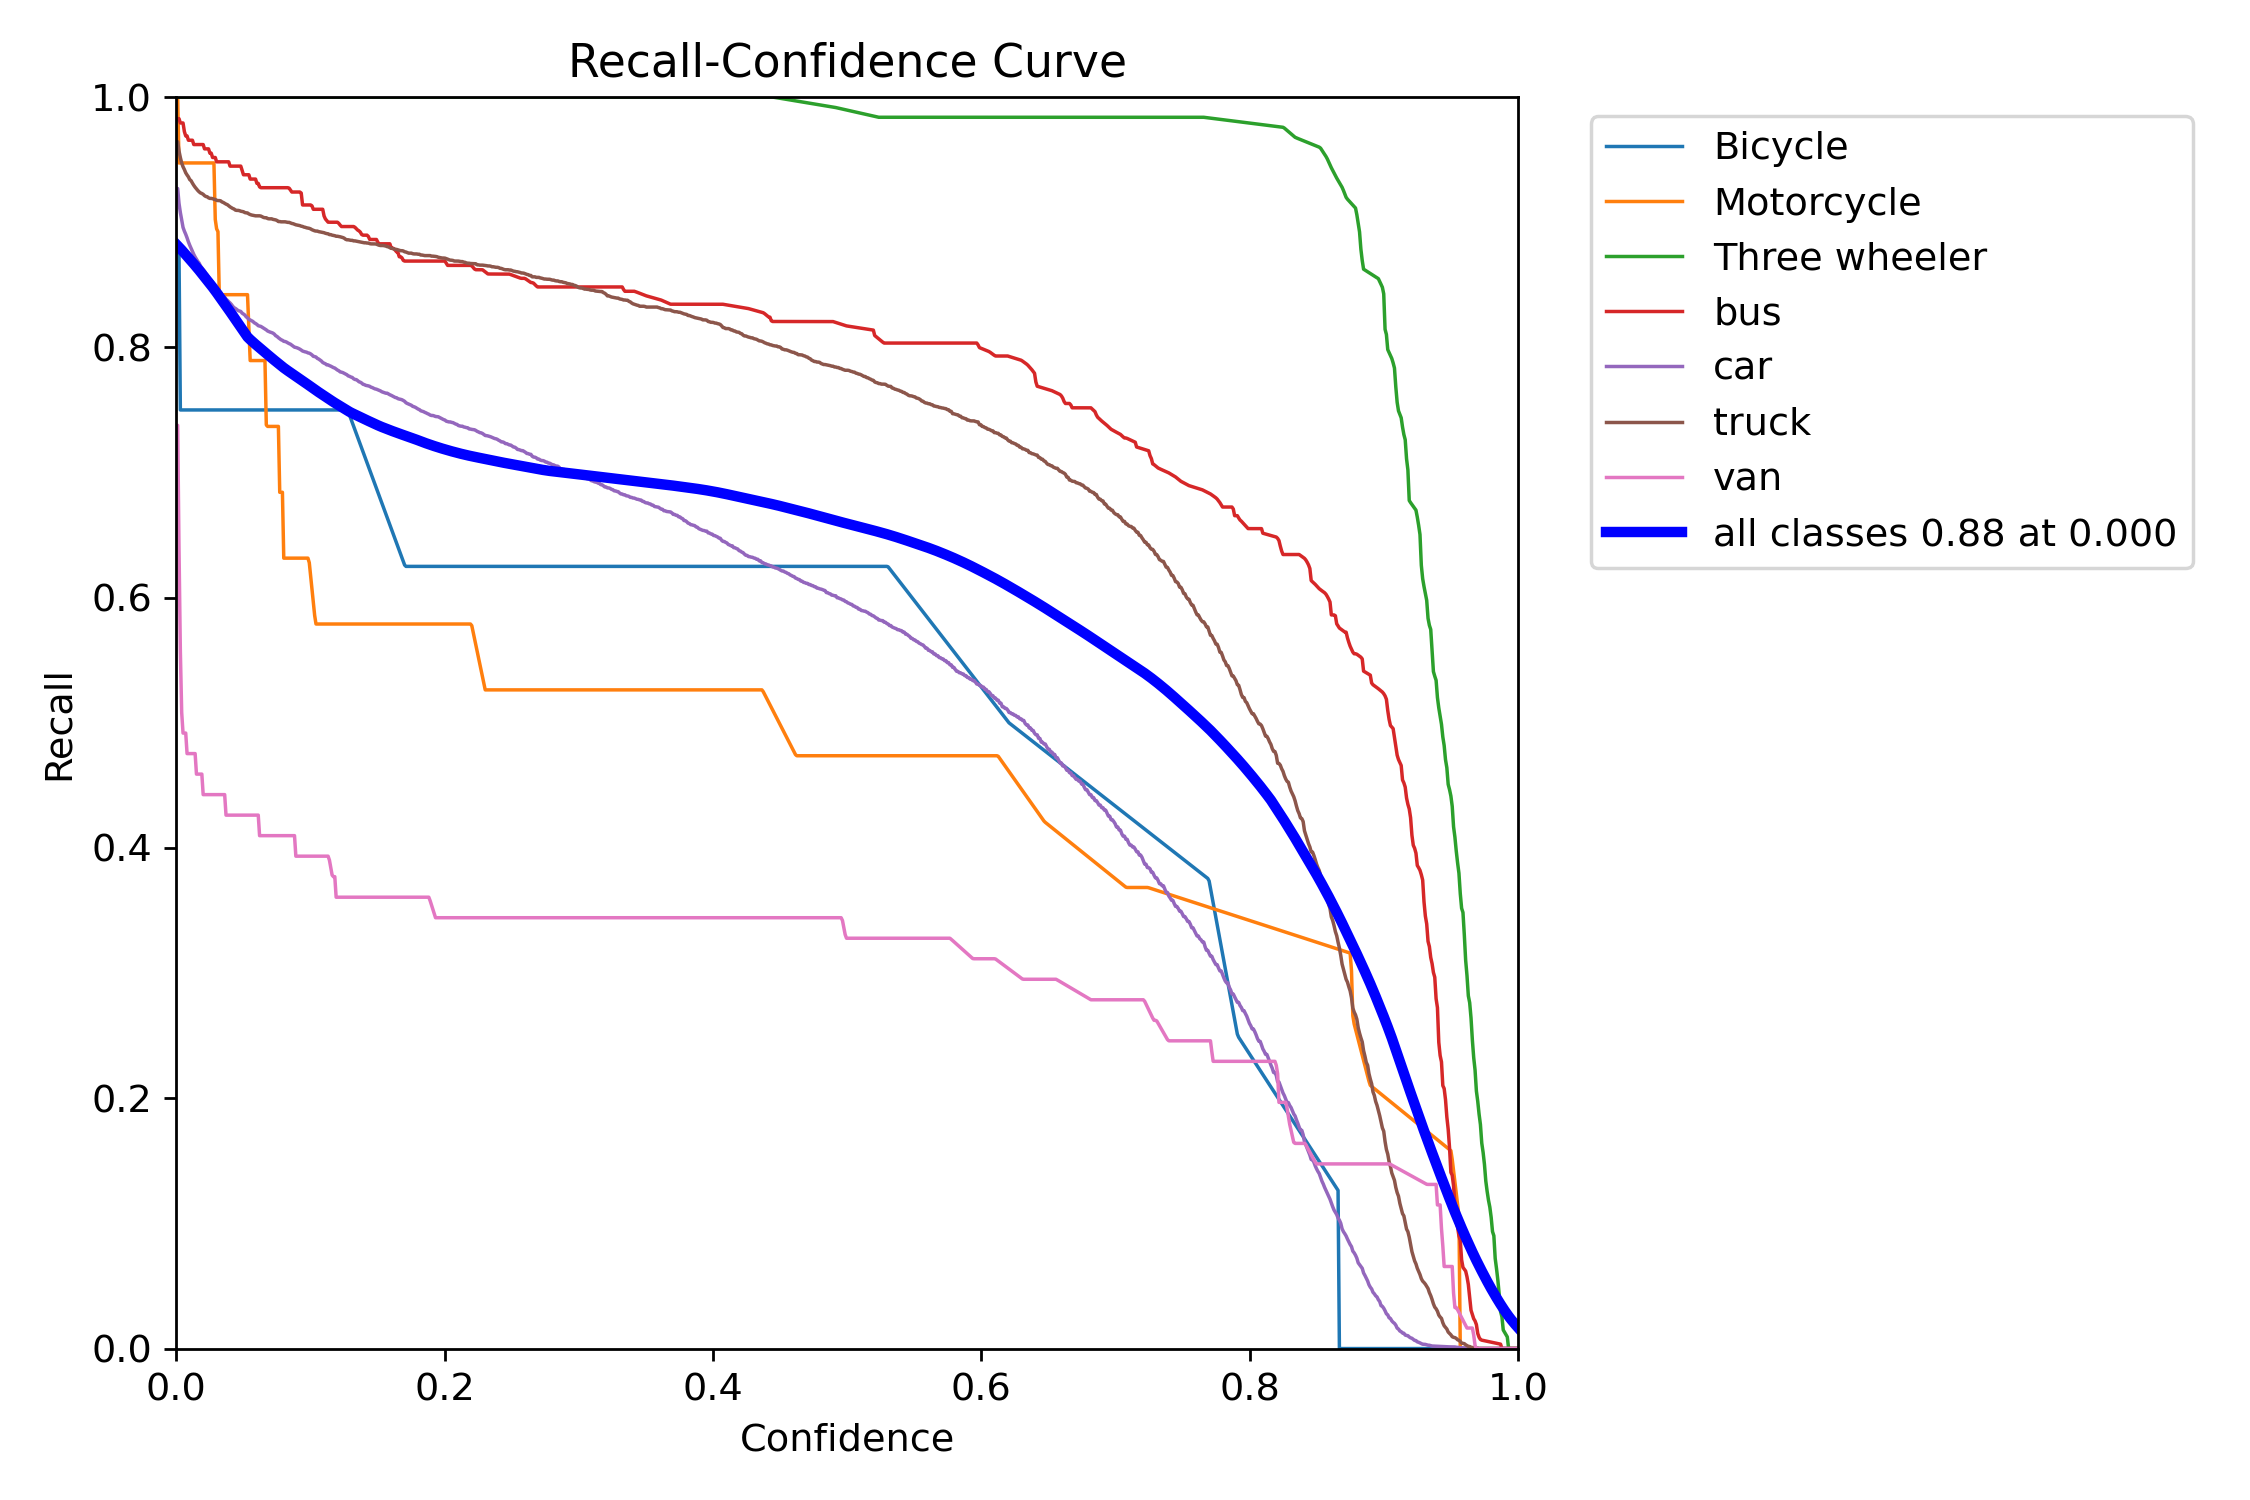

In [ ]:
resultData = "/content/vehicle_Types/vehicle-type-detection-1/runs/detect/train2/"
from IPython.display import Image, display
Image(filename=f'{resultData}BoxR_curve.png')

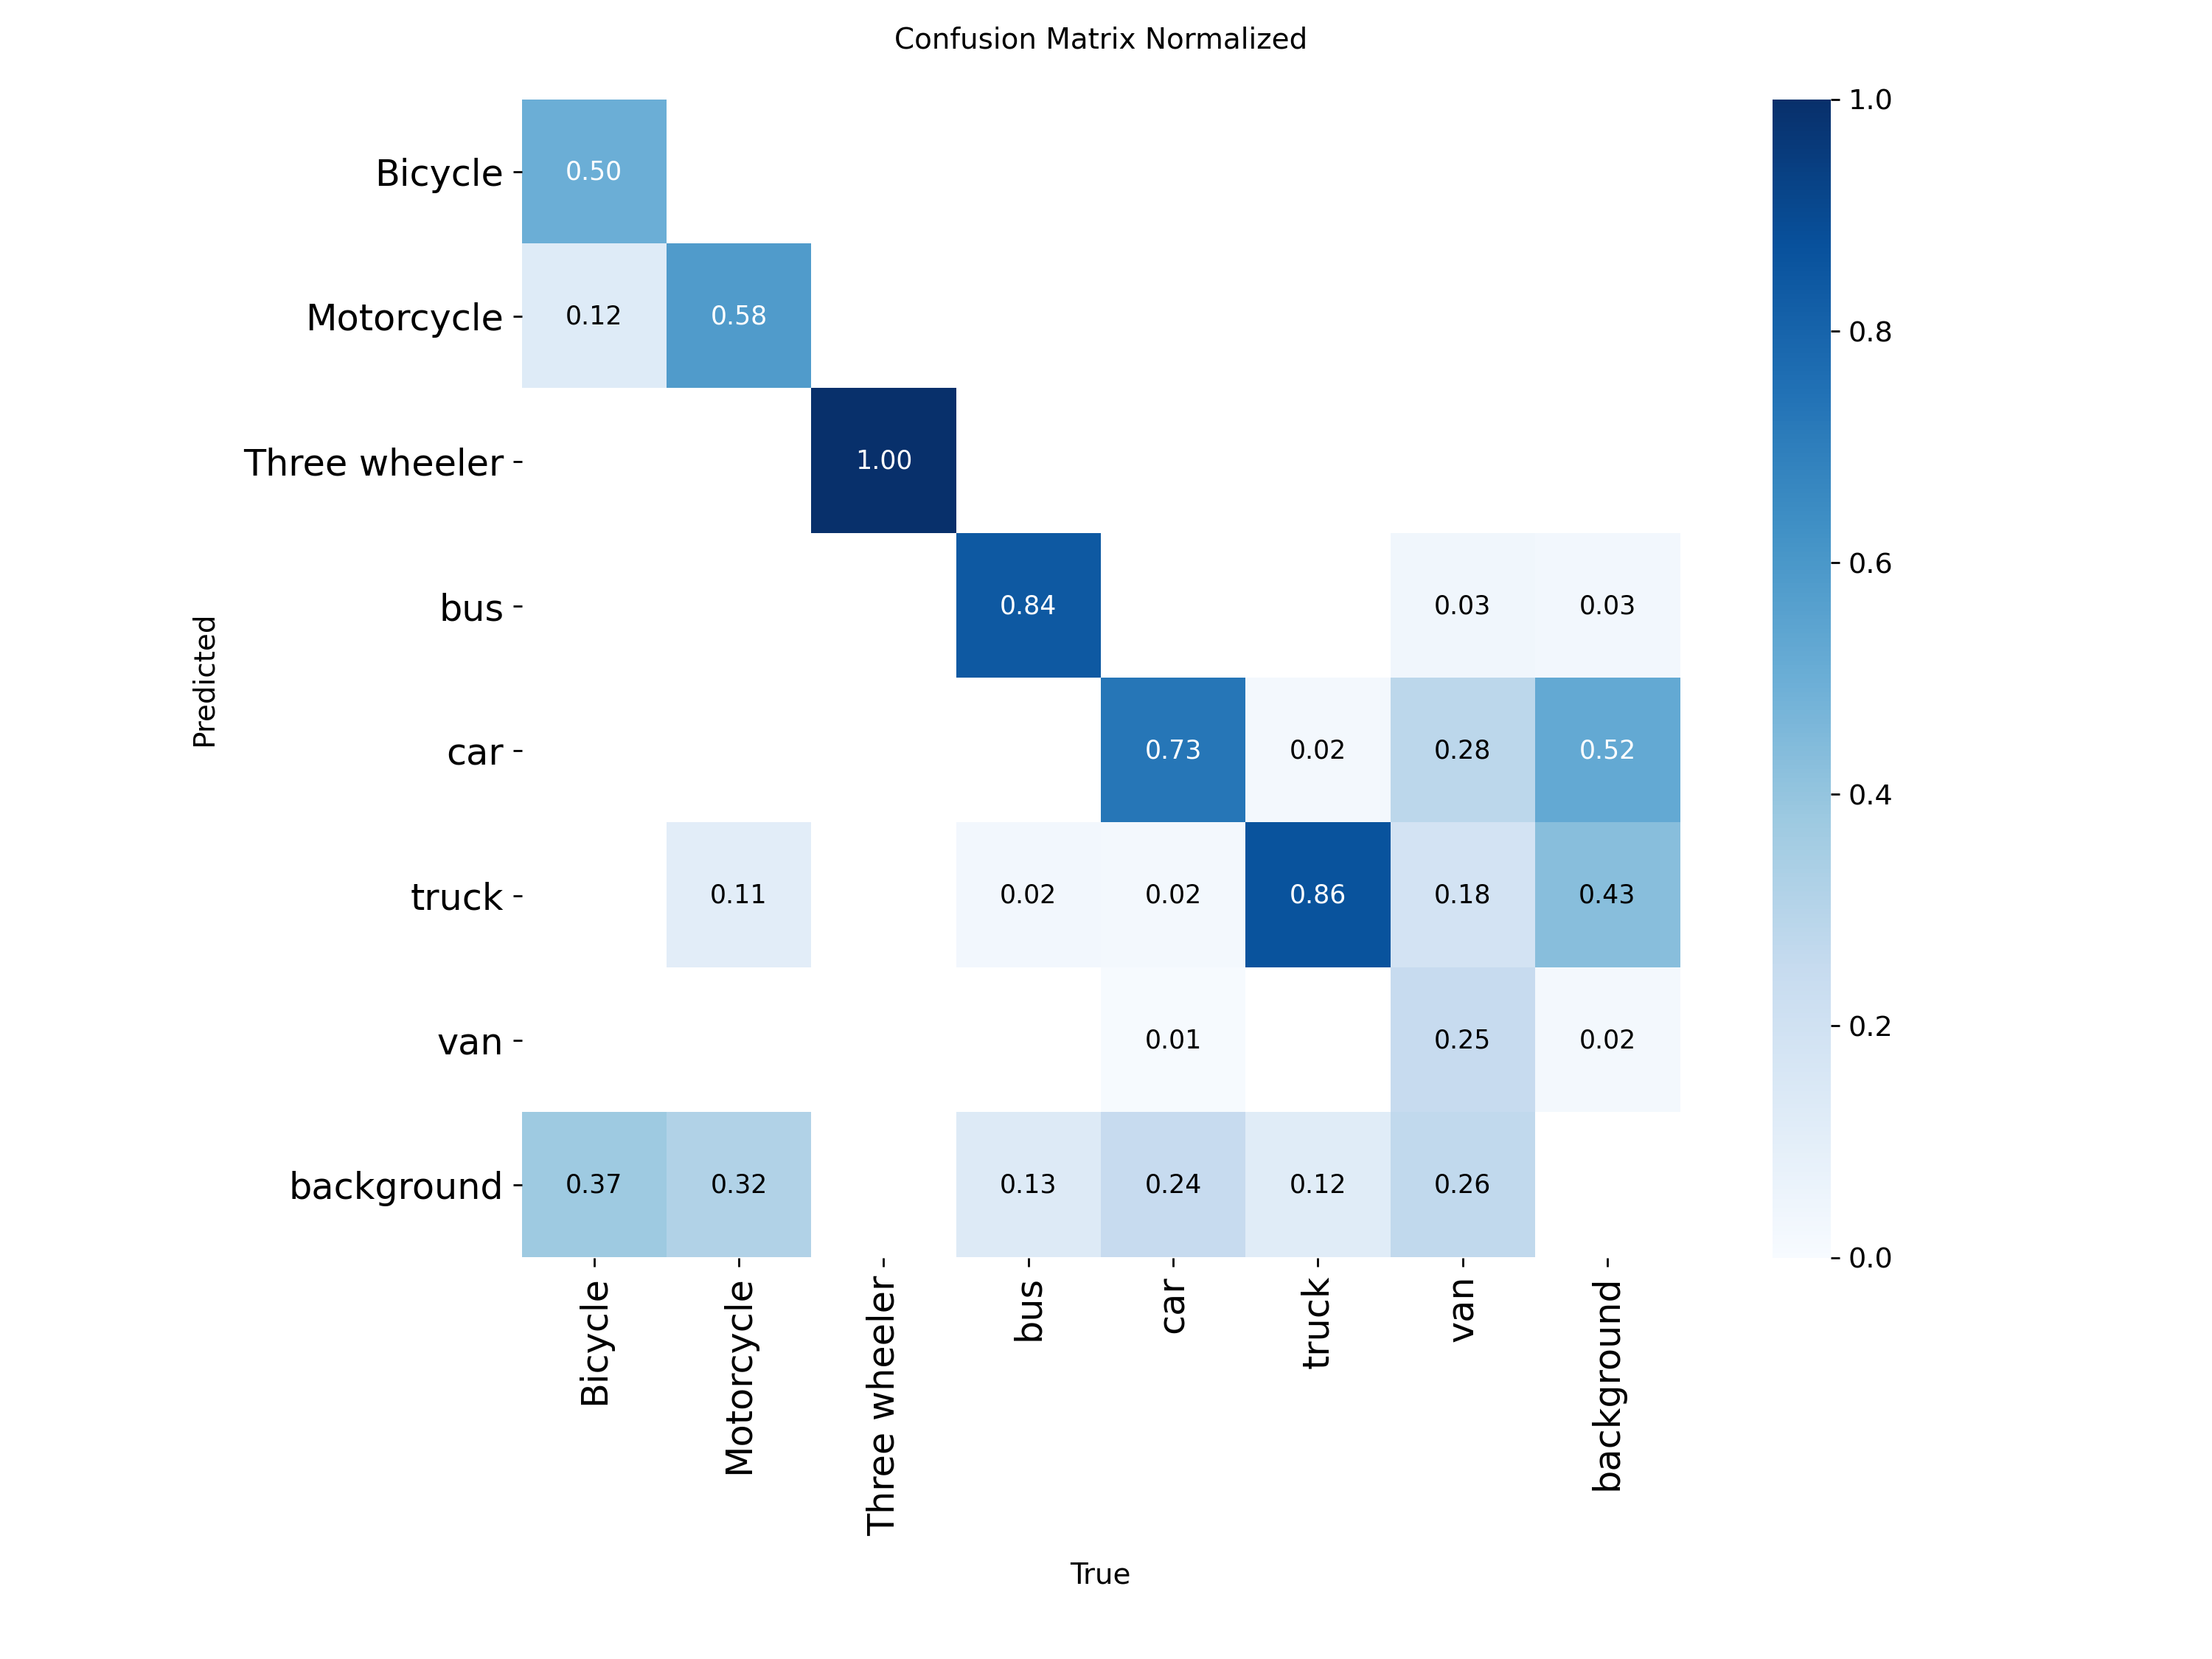

In [ ]:
Image(filename=f'{resultData}confusion_matrix_normalized.png')

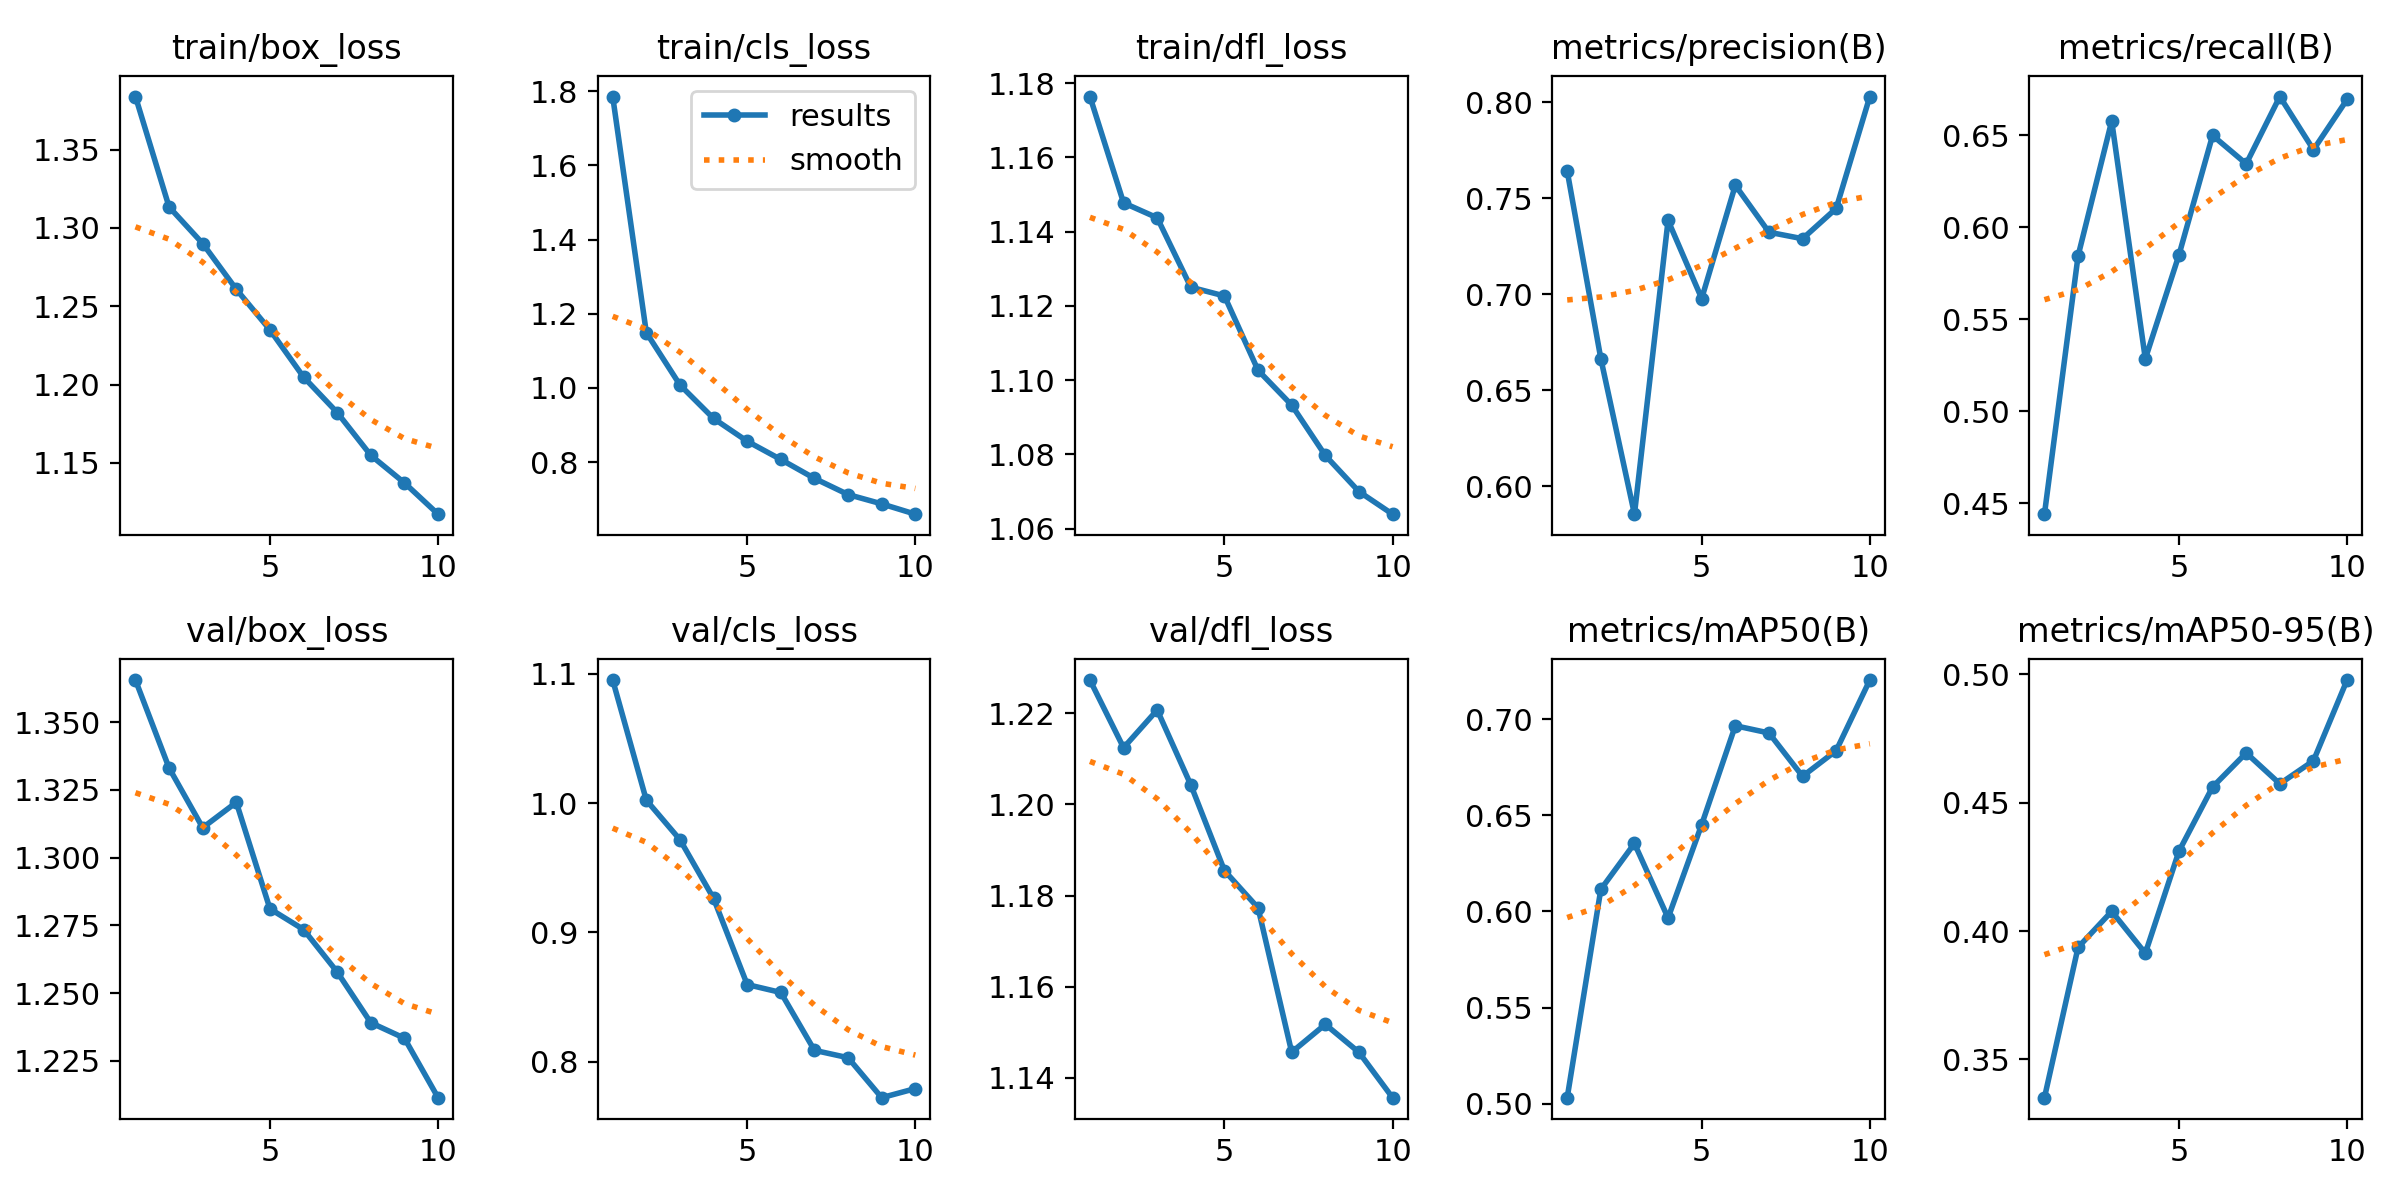

In [ ]:
Image(filename=f'{resultData}results.png')

In [ ]:
%pwd

'/content/vehicle_Types/vehicle-type-detection-1'

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir real_data

In [ ]:
weightPath = "/content/vehicle_Types/vehicle-type-detection-1/runs/detect/train2/weights/"
!yolo task=detect mode=predict model={weightPath}best.pt conf=.25 source="/content/real_data/video1.mov" save= True

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/909) /content/real_data/video1.mov: 384x640 15 cars, 1 truck, 44.9ms
video 1/1 (frame 2/909) /content/real_data/video1.mov: 384x640 15 cars, 1 truck, 8.0ms
video 1/1 (frame 3/909) /content/real_data/video1.mov: 384x640 15 cars, 1 truck, 8.1ms
video 1/1 (frame 4/909) /content/real_data/video1.mov: 384x640 12 cars, 1 truck, 8.7ms
video 1/1 (frame 5/909) /content/real_data/video1.mov: 384x640 17 cars, 1 truck, 8.0ms
video 1/1 (frame 6/909) /content/real_data/video1.mov: 384x640 17 cars, 1 truck, 8.1ms
video 1/1 (frame 7/909) /content/real_data/video1.mov: 384x640 18 cars, 1 truck, 9.7ms
video 1/1 (frame 8/909) /content/real_data/video1.mov: 384x640 16 cars, 1 truck, 7.8ms
video 1/1 (frame 9/909) /content/real_data/video1.mov: 384x640 17 cars, 1 truck, 8.1ms
video 1/1 (frame 10/909) /content/real_data/video1.m

In [ ]:
from google.colab import files

files.download('/content/runs/detect/predict/video1.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
weightPath = "/content/vehicle_Types/vehicle-type-detection-1/runs/detect/train2/weights/"
!yolo task=detect mode=predict model={weightPath}best.pt conf=.25 source="/content/real_data/image1.jpg" save= True

/bin/bash: line 1: yolo: command not found


In [ ]:
weightPath = "/content/vehicle_Types/vehicle-type-detection-1/runs/detect/train2/weights/"
!yolo task=detect mode=predict model={weightPath}best.pt conf=.25 source="/content/real_data/video2.mp4" save= True

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 24 cars, 1 van, 43.3ms
video 1/1 (frame 2/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 24 cars, 1 van, 8.4ms
video 1/1 (frame 3/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 27 cars, 1 van, 7.7ms
video 1/1 (frame 4/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 27 cars, 1 van, 8.6ms
video 1/1 (frame 5/947) /content/real_data/video2.mp4: 384x640 1 Motorcycle, 25 cars, 5.9ms
video 1/1 (frame 6/947) /content/real_data/video2.mp4: 384x640 1 Motorcycle, 25 cars, 7.6ms
video 1/1 (frame 7/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 26 cars, 6.8ms
video 1/1 (frame 8/947) /content/real_data/video2.mp4: 384x640 2 Motorcycles, 26 cars, 9.0ms
video 1/1 (frame 9/947) /content/real_data/video2.mp4: 384x640 3 

In [ ]:
from google.colab import files

files.download('/content/runs/detect/predict2/video2.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
